[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/emilianodesu/RLA3/blob/main/VizDoom-Basic-Demo.ipynb)

# VizDoom Basic Demo

## 0. Setup

In [1]:
%pip install gymnasium gymnasium[other] vizdoom matplotlib stable-baselines3[extra]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

print(f"Current directory: {os.getcwd()}")

# Check that we have cloned the repository
if not os.path.exists('./content/ViZDoom') and not os.path.exists('/content/RLA3'):
    # Clone VizDoom repository to get scenarios
    !git clone https://github.com/emilianodesu/RLA3.git
    print(f"VizDoom cloned from ...")
    os.chdir("RLA3")
else:
    print("Repository already cloned.")

print(f"Current directory: {os.getcwd()}")

SCENARIO_PATH = './content/ViZDoom/scenarios/'

Current directory: c:\Users\cemh0\Documents\LCD\7Sem\ReinforcementLearning\RLA3
Repository already cloned.
Current directory: c:\Users\cemh0\Documents\LCD\7Sem\ReinforcementLearning\RLA3


**Install system dependencies (only needed on Colab)**

In [ ]:
# Install system dependencies for VizDoom on Colab
!apt-get update
!apt-get install -y build-essential zlib1g-dev libsdl2-dev libjpeg-dev \
nasm tar libbz2-dev libgtk2.0-dev cmake git libfluidsynth-dev libgme-dev \
libopenal-dev timidity libwildmidi-dev unzip libboost-all-dev

# Install Xvfb for virtual display (headless rendering)
!apt-get install -y xvfb

# Set up virtual display
os.system('Xvfb :1 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':1'

print("System dependencies installed!")

In [3]:
from utils import run_vizdoom_demo

--- Starting VizDoom demo: basic, render_mode=rgb_array, frame_skip=4 ---

[ Gymnasium check_env validation ]

--- Episode 1 ---
Step 000 | action=0 | reward=-4.00 | info={'variables': array([50.])}
Step 001 | action=2 | reward=-4.00 | info={'variables': array([50.])}


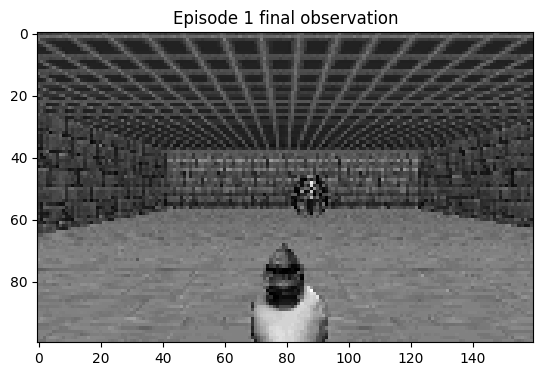

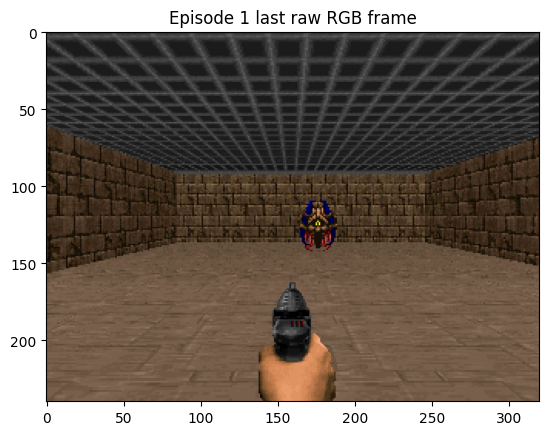


--- Demo finished ---


In [4]:
run_vizdoom_demo(cfg_path=SCENARIO_PATH, cfg="basic", episodes=1, steps=2, render_mode="rgb_array", frame_skip=4)

## 1. Training a RL agent with Stable Baselines3

Training might be run either on this cell or in a terminal.

In [ ]:
!python train_ppo.py --cfg_path ./content/ViZDoom/scenarios/

In [5]:
%load_ext tensorboard

In [10]:
%tensorboard --logdir ./logs/log_basic --port 6007

Reusing TensorBoard on port 6007 (pid 7340), started 0:04:37 ago. (Use '!kill 7340' to kill it.)

## 2. Testing the trained agent and visualize results

Testing might be run either on this cell or in a terminal.

In [24]:
!python test_ppo.py --model_path ./train/train_basic/final_model --video --cfg_path ./content/ViZDoom/scenarios/

Loading model from: ./train/train_basic/final_model

Evaluation over 10 episodes:
   Mean reward = -20.60 ± 118.79

Recording gameplay for 500 steps...
Saving video to C:\Users\cemh0\Documents\LCD\7Sem\ReinforcementLearning\RLA3\videos\basic\ppo-basic-test-step-0-to-step-500.mp4
MoviePy - Building video C:\Users\cemh0\Documents\LCD\7Sem\ReinforcementLearning\RLA3\videos\basic\ppo-basic-test-step-0-to-step-500.mp4.
MoviePy - Writing video C:\Users\cemh0\Documents\LCD\7Sem\ReinforcementLearning\RLA3\videos\basic\ppo-basic-test-step-0-to-step-500.mp4

MoviePy - Done !
MoviePy - video ready C:\Users\cemh0\Documents\LCD\7Sem\ReinforcementLearning\RLA3\videos\basic\ppo-basic-test-step-0-to-step-500.mp4
Video saved in: ./videos/basic




frame_index:  92%|█████████▏| 459/501 [00:01<00:00, 438.80it/s, now=None]
                                                                         


In [7]:
import pandas as pd

eval_logs = pd.read_csv('./logs/eval_basic/basic_eval.csv', skiprows=1)
eval_logs

,r,l,t
0,60.0,10,1.059375
1,-4.0,2,1.213471
2,60.0,10,1.583526
3,-4.0,2,1.802500
4,-4.0,2,1.973114
...,...,...,...
92,-4.0,2,22.533886
93,-4.0,2,22.657409
94,-4.0,2,22.819057
95,-4.0,2,22.905555


## 3. Display the recorded video

In [8]:
from utils import display_video

display_video("./videos/basic/ppo-basic-test-step-0-to-step-500.mp4", width=640, height=480)